<a href="https://colab.research.google.com/github/sailalitha96/Lung-Nodule-Detection/blob/master/mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.layers import Input, merge
from keras.layers import Convolution2D , concatenate ,Conv2D,Dense
from keras.layers import Activation,Dropout, GlobalAveragePooling2D,BatchNormalization,SeparableConv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import  to_categorical
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.contrib.slim as slim
from keras.layers.core import Dense,Dropout,Activation,Flatten,Lambda
from PIL import Image
from sklearn.utils import class_weight
from scipy.misc import imread
from joblib import Parallel, delayed
import tflearn as tf
from tflearn.data_utils import build_hdf5_image_dataset
from scipy.ndimage import rotate, imread
import h5py
import numpy as np 
import pandas as pd
%matplotlib inline
from IPython.display import clear_output
pd.options.mode.chained_assignment = None
from keras.layers import Input, merge
from keras.models import Sequential 
from keras.layers import Convolution2D , concatenate ,Conv2D,Dense
from keras.layers import Activation,Dropout, GlobalAveragePooling2D,MaxPooling2D
from keras.models import Model
from keras.optimizers import Adam ,SGD,RMSprop
from keras.utils import  to_categorical
import tensorflow as tf
import numpy as np
# import matplotlib.pyplot as plt
# print(matplotlib.__file__)
from keras.optimizers import *
from keras.models import Model
from keras.layers import *
from keras.activations import *
from keras.callbacks import *

In [0]:
from google.colab import drive
drive.mount('/content/drive')

#replace with the location of your Part4 folder...
%cd "/content/drive/My Drive/Colab Notebooks" 
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks
 4_1.pkl			  helper.py
 4_2.pkl			  HW_4_part4.ipynb
 4_3.pkl			 'hw6-part(A).ipynb'
'architecture -testing.ipynb'	  mobilenet.ipynb
 base.csv			  resnet.ipynb
 baseline.ipynb			 'test1 - baseline-ipynb.ipynb'
'Copy of cis580_2019_hw6.ipynb'   texts.csv
 documentation.docx		  texts.out
 farm.jpg			  train_againdataset.h5
 Fritz.ipynb			  Untitled0.ipynb
'gauri (1).ipynb'		  Untitled1.ipynb
 gauri.ipynb			  val_againdataset.h5


In [0]:
def build_squeezenet_depthwise(input_shape, width_multiplier = 1):
    
    # call depthwise convolution - step 1 
    # call pointwise conolution - step 2 
    

    input_layer = Input((input_shape))
    
    # the spatial convolutional network is 1x3 and then 3x1 . Implementd in the below function 

    x = Convolution2D(int(32), (3, 3), padding='same')(input_layer)
    # each layer is passed through a bath normalization , helps in normalizing .
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    

    x = DepthwiseConvolution2D(x,int(32), padding='same')
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Convolution2D(int(64), (1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = DepthwiseConvolution2D(x,int(64), padding='same')
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Convolution2D(int(128), (1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = DepthwiseConvolution2D(x,int(128), padding='same')
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Convolution2D(int(128) ,(1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = DepthwiseConvolution2D(x,int(128), padding='same')
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Convolution2D(int(256), (1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = DepthwiseConvolution2D(x,int(256), padding='same')
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Convolution2D(int(256), (1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = DepthwiseConvolution2D(x,int(256), padding='same')
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Convolution2D(int(512), (1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(2,kernel_size=(1,1),padding='valid',activation='relu')(x)
    x = GlobalAveragePooling2D()(x)
    
   
    x = Dense(2, activation='softmax')(x)
    
    
    model = Model(input_layer, x, name='mobilenet')
    return model 
    
    
    
    
    

def DepthwiseConvolution2D( inputs , filter_size, width=1, padding='same') :
    
    # call depthwise convolution - step 1 
    # call pointwise conolution - step 2 
    
    # the seperable convoltuion makes 3x3 filters 
    #applied first 1x3 and then 3x1. 
    
    x = SeparableConv2D(filter_size, kernel_size=(3,3) , strides = (1, 1),depth_multiplier= 1)(inputs)
#     out = slim.separable_convolution2d(inputs,num_outputs=None,
#                                                   stride=(2,2),
#                                                   padding ="SAME",
#                                                   depth_multiplier=1,
#                                                   kernel_size=[3, 3])
    
    num_pwc_filters = int(filter_size*width)
    
#     batch =slim.batch_norm(out)
    x = BatchNormalization()(x)
    

    
#     point_out=  slim.convolution2d(batch,num_pwc_filters,kernel_size=[1, 1])
    x = Convolution2D(filter_size,kernel_size =(1, 1), strides=(1, 1), padding='same')(x)
   
    x = BatchNormalization()(x)
    print(x.shape)

    return x
    

In [0]:
def load_hdf_dataset(mode):
    h5_file = h5py.File(mode+ 'dataset.h5', 'r')
    images = h5_file ['X']
    labels = h5_file ['Y'][:]
    
    images = images[:,:,:].reshape([-1,50,50,1])
    h5_file.close()
    return images, labels 




train_images , tr_labels = load_hdf_dataset('train_again')

    

val_images , val_labels = load_hdf_dataset('val_again')

# images = np.concatenate((train_images,val_images))

# labels  = np.concatenate((tr_labels,val_labels))

# getting indexes
lab_0 = tr_labels[:,0] 
zeros_class= np.where(lab_0 ==1)
lab_1 = tr_labels[:,1]
ones_class= np.where(lab_1 ==1)

for no in zeros_class:
    train_0 = train_images[no,:,:,:]
    train_labels_0 = tr_labels[no,:]

for no in ones_class:
    
    train_1 = train_images[no,:,:,:]
    train_labels_1 = tr_labels[no,:]


train_0 = train_0[ :len(train_labels_1), :,:,:]
train_labels_0= train_labels_0[ :len(train_labels_1), :]

images = np.concatenate((train_0,train_1))
images = np.asarray(images)

labels =  np.concatenate((train_labels_0,train_labels_1))
labels = np.asarray(labels)
labels.shape


(5196, 2)

In [0]:
model_dw = build_squeezenet_depthwise(input_shape= (50,50,1))

# sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
sgd = Adam(lr=0.0001)
model_dw.compile(
    optimizer=sgd, loss='categorical_crossentropy',
    metrics=['accuracy'])

# weights = class_weight.compute_class_weight('balanced',
#                                             np.unique(val_labels[:,0]) ,
#                                             val_labels[:,0])

wt = np.array([ 0.4,0.6])
model_dw.summary()
history = model_dw.fit(x=train_images, 
            y=tr_labels, 
            batch_size=32,
            epochs=20, 
            verbose=1,  
#             validation_split=0.2,
            class_weight= wt,
            validation_data=(val_images,val_labels), 
            shuffle=True)


(?, 48, 48, 32)
(?, 46, 46, 64)
(?, 44, 44, 128)
(?, 42, 42, 128)
(?, 40, 40, 256)
(?, 38, 38, 256)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 48, 48, 32)        1344      
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 32)        128       
__________________________________________

In [0]:
history.history['val_acc']
# plt.plot(history.history['val_acc'])

[0.5882744836775483,
 0.6089273818745603,
 0.6249167223142672,
 0.6109260492905388,
 0.6542305129714842,
 0.5909393737483509,
 0.6449033977944084,
 0.6835443036981934,
 0.6995336441974652,
 0.6502331780104698,
 0.6515656228981996,
 0.6948700865096525,
 0.7028647573450102,
 0.7161892071554933,
 0.7021985345487194,
 0.7081945372136095,
 0.7135243173601784,
 0.6908727513798708,
 0.6955363093655083,
 0.6908727513004509]

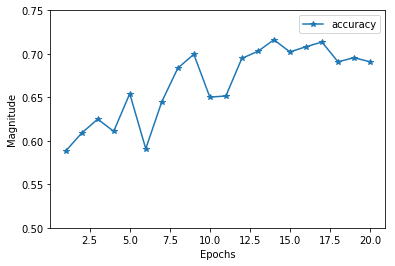

In [0]:
epochs = [i+1 for i in range(20)]
f, ax = plt.subplots(1)
ax.plot(epochs, history.history['val_acc'],marker = '*')
ax.set_ylim(bottom=0.5,top=0.75)
plt.xlabel('Epochs')
plt.ylabel('Magnitude')
plt.legend(['accuracy'])
plt.show(f)

In [0]:
pred = model_dw.predict(val_images)
y_score = pred[:,1]
y_true=val_labels[:,1]
from sklearn.metrics import roc_curve , confusion_matrix 


fpr , tpr, thres = roc_curve(y_true , y_score , pos_label = 1) 

y= []
for i in range(len(y_score)):
    if (y_score[i]>=0.5):
        y.append(1)
    else :
        y.append(0)

y = np.asarray(y)
y

tn , fp , fn , tp = confusion_matrix(y_true, y).ravel()
tn , fp , fn , tp

(838, 33, 257, 373)

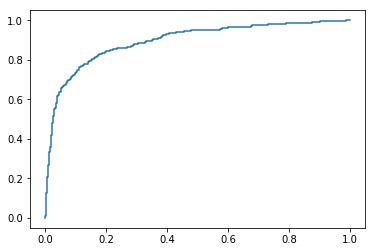

In [0]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr)

0.8941738195469537


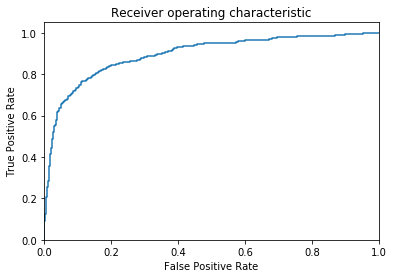

In [0]:
pred = model_dw.predict(val_images)
y_score = pred[:,1]
y_true=val_labels[:,1]

from sklearn.metrics import roc_curve , confusion_matrix 


fpr , tpr, thres = roc_curve(y_true , y_score , pos_label = 1) 

y= []
for i in range(len(y_score)):
    if (y_score[i]>=0.5):
        y.append(1)
    else :
        y.append(0)

y = np.asarray(y)
y

tn , fp , fn , tp = confusion_matrix(y_true, y).ravel()
tn , fp , fn , tp



import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc , roc_auc_score
f = dict()
t = dict()
roc_auc = dict()
for i in range(2):
    f[i], t[i], _ = roc_curve(y_true, y_score)
    roc_auc[i] = auc(f[i], t[i])

print (roc_auc_score(y_true, y_score))
plt.figure()
plt.plot(f[1], t[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

0.9063728974176736


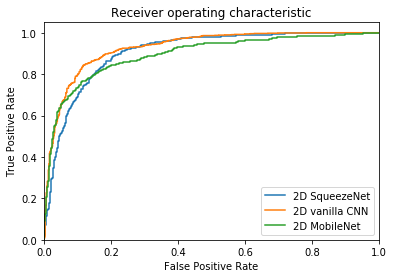

In [0]:
## getting squeezenet values from desktop 

y_sq =pd.read_csv('texts.csv')

y_sq = y_sq.iloc[:, 1]
y_sq.tolist()
y_sq= np.asarray(y_sq)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc , roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_true, y_sq)
    roc_auc[i] = auc(fpr[i], tpr[i])

print (roc_auc_score(y_true, y_sq))
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.plot(f_b[1], t_b[1])
plt.plot(f[1],t[1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['2D SqueezeNet','2D vanilla CNN', '2D MobileNet'])
plt.title('Receiver operating characteristic')
plt.show()

0.9283198174675811


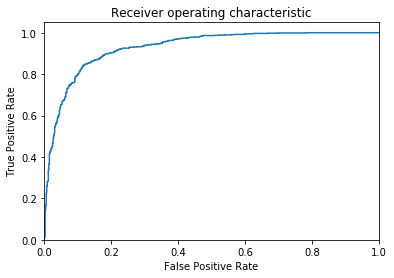